https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [49]:
!start .

In [3]:
!ls

Untitled.ipynb             pimaindiansdiabetescsv.zip
pima-indians-diabetes.csv  titanic3.xls


In [1]:
import numpy as np
import csv

In [2]:
filename = "pima-indians-diabetes.csv"
raw_data = open(filename, 'rb')
data = np.loadtxt(raw_data,delimiter=",")
print(data.shape)

(768, 9)


In [3]:
data

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

In [4]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [5]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv("pima-indians-diabetes.csv",names=names)
#pd.set_option('display.width', 100)
pd.set_option('precision', 3)

In [6]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [8]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [9]:
class_counts = data.groupby('class').size() 
print(class_counts)

class
0    500
1    268
dtype: int64


## Correlations Between Attributes

La correlación se refiere a la relación entre dos variables y cómo pueden o no cambiar juntas. El método más común para calcular la correlación es el coeficiente de correlación de Pearson, que supone una distribución normal de los atributos involucrados. Una correlación de -1 o 1 muestra una correlación negativa o positiva completa, respectivamente. Mientras que un valor de 0 no muestra ninguna correlación en absoluto. Algunos algoritmos de aprendizaje automático como la regresión lineal y logística pueden sufrir un bajo rendimiento si hay atributos altamente correlacionados en su conjunto de datos.

In [10]:
correlations = data.corr(method='pearson') 
print(correlations)

        preg   plas   pres   skin   test   mass   pedi    age  class
preg   1.000  0.129  0.141 -0.082 -0.074  0.018 -0.034  0.544  0.222
plas   0.129  1.000  0.153  0.057  0.331  0.221  0.137  0.264  0.467
pres   0.141  0.153  1.000  0.207  0.089  0.282  0.041  0.240  0.065
skin  -0.082  0.057  0.207  1.000  0.437  0.393  0.184 -0.114  0.075
test  -0.074  0.331  0.089  0.437  1.000  0.198  0.185 -0.042  0.131
mass   0.018  0.221  0.282  0.393  0.198  1.000  0.141  0.036  0.293
pedi  -0.034  0.137  0.041  0.184  0.185  0.141  1.000  0.034  0.174
age    0.544  0.264  0.240 -0.114 -0.042  0.036  0.034  1.000  0.238
class  0.222  0.467  0.065  0.075  0.131  0.293  0.174  0.238  1.000


## Skew of Univariate Distributions

Inclinación se refiere a una distribución que se supone gaussiana (curva normal o de campana) que se desplaza o aplasta en una dirección u otra. Muchos algoritmos de aprendizaje automático asumen una distribución gaussiana. Saber que un atributo tiene un sesgo puede permitirle realizar la preparación de datos para corregir el sesgo y luego mejorar la precisión de sus modelos.

- El resultado de inclinación(skew) muestra una inclinación positiva (derecha) o negativa (izquierda). Los valores más cercanos a cero muestran menos sesgo.

In [11]:
skew = data.skew() 
print(skew)

preg     0.902
plas     0.174
pres    -1.844
skin     0.109
test     2.272
mass    -0.429
pedi     1.920
age      1.130
class    0.635
dtype: float64


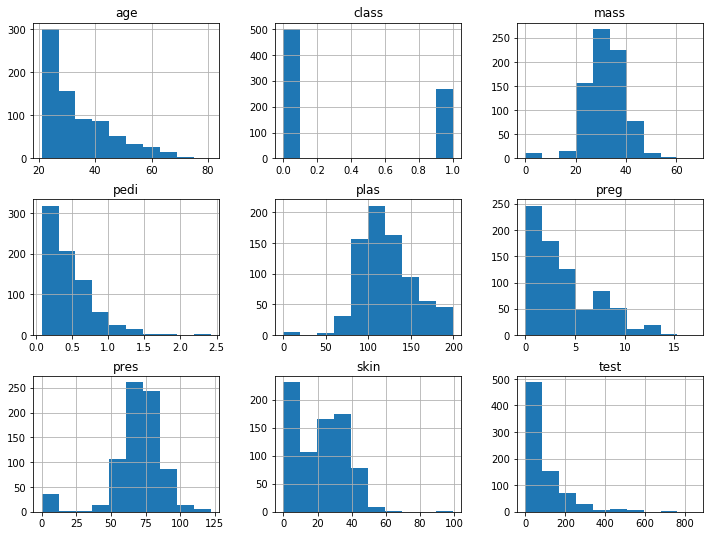

In [12]:

data.hist(figsize=(12,9));

Podemos ver que quizás los atributos age, pedi y test pueden tener una distribución exponencial.

También podemos ver que quizás los atributos de masa, presión y plas pueden tener una distribución gaussiana o casi gaussiana. 

Esto es interesante porque muchas técnicas de aprendizaje automático suponen una distribución univariada gaussiana en las variables de entrada.

Los gráficos de densidad son otra forma de tener una idea rápida de la distribución de cada atributo.

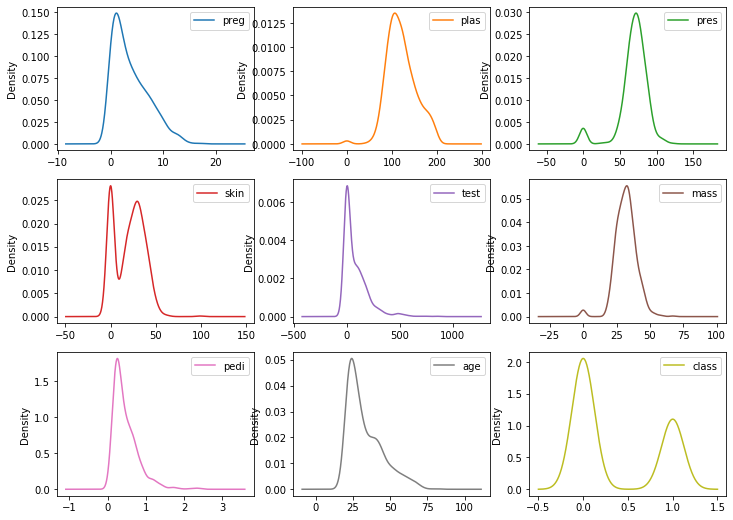

In [13]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False,figsize=(12,9));



Otra forma útil de revisar la distribución de cada atributo es usar Gráficos de caja y bigotes o gráficos de caja para abreviar. Los diagramas de caja resumen la distribución de cada atributo, dibujando una línea para la mediana (valor medio) y un cuadro alrededor de los percentiles 25 y 75 (el 50% medio de los datos). Los bigotes dan una idea de la propagación de los datos y los puntos fuera de los bigotes muestran valores atípicos candidatos (valores que son 1.5 veces mayores que el tamaño de propagación del 50% medio de los datos).

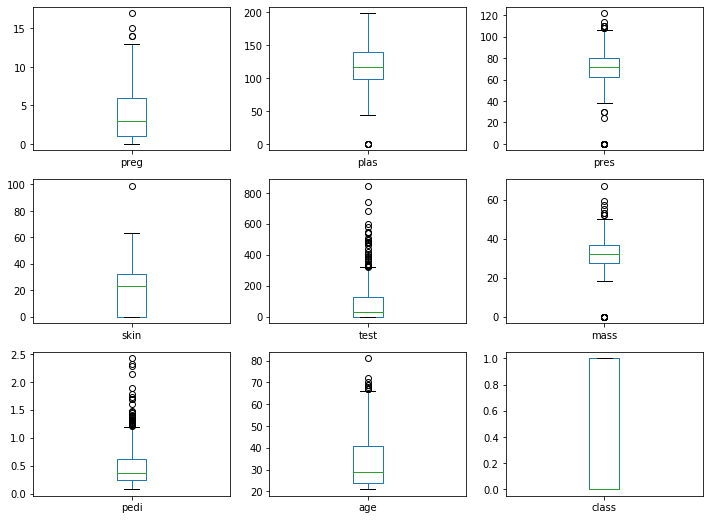

In [14]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,figsize=(12,9));


Podemos ver que la propagación de los atributos es bastante diferente. Algunos como la edad, la prueba y la piel parecen bastante sesgados hacia valores más pequeños.

## Scatter Plot Matrix

Un diagrama de dispersión muestra la relación entre dos variables como puntos en dos dimensiones, un eje para cada atributo.

Puede crear un diagrama de dispersión para cada par de atributos en sus datos. 

Dibujar todos estos diagramas de dispersión juntos se llama matriz de diagrama de dispersión. 

Los diagramas de dispersión son útiles para detectar relaciones estructuradas entre variables, como si pudieras resumir la relación entre dos variables con una línea. Los atributos con relaciones estructuradas también pueden estar correlacionados y son buenos candidatos para la eliminación de su conjunto de datos.

In [15]:
from pandas.plotting import scatter_matrix

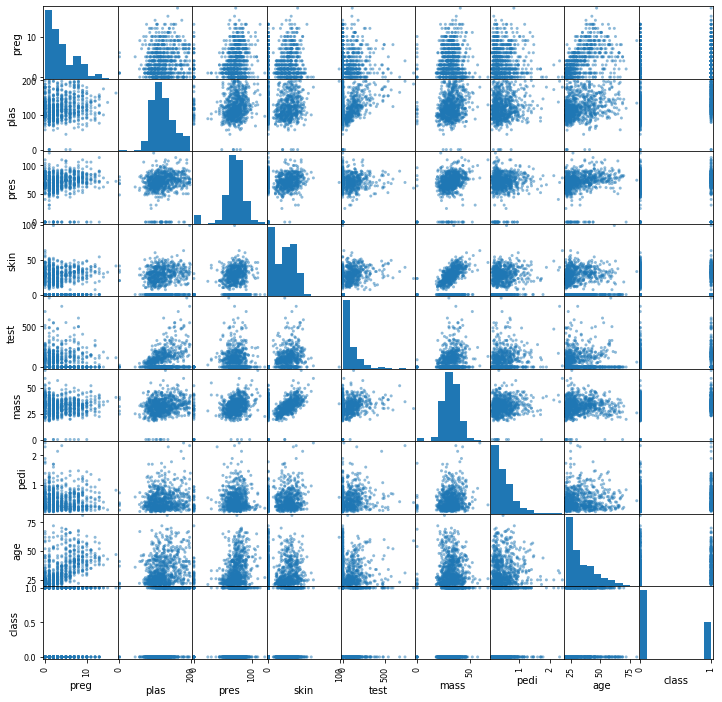

In [16]:
scatter_matrix(data,figsize=(12,12));

## Prepare Your Data For Machine Learning

Muchos algoritmos de aprendizaje automático hacen suposiciones sobre sus datos. A menudo es una muy buena idea preparar sus datos de tal manera que exponga mejor la estructura del problema a los algoritmos de aprendizaje automático que piensa usar. 

1. Rescale data.

2. Standardize data.

3. Normalize data.

4. Binarize data.

Una dificultad es que diferentes algoritmos hacen suposiciones diferentes acerca de sus datos y pueden requerir diferentes transformaciones. Además, cuando sigue todas las reglas y prepara sus datos, a veces los algoritmos pueden ofrecer mejores resultados sin procesamiento previo.

### Rescale Data

Cuando sus datos se componen de atributos con escalas variables, muchos algoritmos de aprendizaje automático pueden beneficiarse de reescalar los atributos para que todos tengan la misma escala. 

A menudo esto se conoce como normalización y los atributos a menudo se reescalan en el rango entre 0 y 1. 

Esto es útil para los algoritmos de optimización utilizados en el núcleo de los algoritmos de aprendizaje automático como el descenso de gradiente. 

También es útil para algoritmos que ponderan entradas como regresión y redes neuronales y algoritmos que usan medidas de distancia como k-Nearest Neighbours. Puede reescalar sus datos usando scikit-learn usando la clase MinMaxScaler

In [17]:
# Rescale data (between 0 and 1)
from sklearn.preprocessing import MinMaxScaler

In [18]:
np.set_printoptions(precision=3)
scaler = MinMaxScaler(feature_range=(0, 1)) 
rescaledX = scaler.fit_transform(data.values)

rescaledX[0:5,:]

array([[0.353, 0.744, 0.59 , 0.354, 0.   , 0.501, 0.234, 0.483, 1.   ],
       [0.059, 0.427, 0.541, 0.293, 0.   , 0.396, 0.117, 0.167, 0.   ],
       [0.471, 0.92 , 0.525, 0.   , 0.   , 0.347, 0.254, 0.183, 1.   ],
       [0.059, 0.447, 0.541, 0.232, 0.111, 0.419, 0.038, 0.   , 0.   ],
       [0.   , 0.688, 0.328, 0.354, 0.199, 0.642, 0.944, 0.2  , 1.   ]])

Después de reescalar puede ver que todos los valores están en el rango entre 0 y 1.

### Standardize Data

La estandarización es una técnica útil para transformar atributos con una distribución gaussiana y diferenciar los medios y las desviaciones estándar a una distribución gaussiana estándar con una media de 0 y una desviación estándar de 1.

Es más adecuada para las técnicas que asumen una distribución gaussiana en las variables de entrada. y funciona mejor con datos reescalados, como regresión lineal, regresión logística y análisis discriminante lineal.

In [19]:
# Standardize data (0 mean, 1 stdev) f
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler().fit(data.values) 
rescaledX = scaler.transform(data.values)
rescaledX[0:5,:]

array([[ 0.64 ,  0.848,  0.15 ,  0.907, -0.693,  0.204,  0.468,  1.426,
         1.366],
       [-0.845, -1.123, -0.161,  0.531, -0.693, -0.684, -0.365, -0.191,
        -0.732],
       [ 1.234,  1.944, -0.264, -1.288, -0.693, -1.103,  0.604, -0.106,
         1.366],
       [-0.845, -0.998, -0.161,  0.155,  0.123, -0.494, -0.921, -1.042,
        -0.732],
       [-1.142,  0.504, -1.505,  0.907,  0.766,  1.41 ,  5.485, -0.02 ,
         1.366]])

### Normalize Data

Normalizar en scikit-learn se refiere a reescalar cada observación (fila) para que tenga una longitud de 1 (llamada norma unitaria o un vector con la longitud de 1 en álgebra lineal). 

Este método de preprocesamiento puede ser útil para conjuntos de datos dispersos (muchos ceros) con atributos de escalas variables cuando se utilizan algoritmos que ponderan valores de entrada como redes neuronales y algoritmos que usan medidas de distancia como k-Nearest Neighbours.

In [21]:
# Normalize data (length of 1) 
from sklearn.preprocessing import Normalizer

In [22]:
scaler = Normalizer().fit(data.values) 
normalizedX = scaler.transform(data.values)
normalizedX[0:5,:]

array([[0.034, 0.828, 0.403, 0.196, 0.   , 0.188, 0.004, 0.28 , 0.006],
       [0.008, 0.716, 0.556, 0.244, 0.   , 0.224, 0.003, 0.261, 0.   ],
       [0.04 , 0.924, 0.323, 0.   , 0.   , 0.118, 0.003, 0.162, 0.005],
       [0.007, 0.588, 0.436, 0.152, 0.622, 0.186, 0.001, 0.139, 0.   ],
       [0.   , 0.596, 0.174, 0.152, 0.731, 0.188, 0.01 , 0.144, 0.004]])

### Binarize Data (Make Binary)

Puede transformar sus datos utilizando un umbral binario. Todos los valores por encima del umbral están marcados con 1 y todos iguales o inferiores están marcados con 0. 

Esto se denomina binarizar sus datos o poner en umbral sus datos. Puede ser útil cuando tienes probabilidades de que quieras hacer valores nítidos. 

También es útil cuando se trata de ingeniería de características y desea agregar nuevas características que indiquen algo significativo.

In [23]:
# binarization 
from sklearn.preprocessing import Binarizer

In [24]:
binarizer = Binarizer(threshold=0.0).fit(data.values) 
binaryX = binarizer.transform(data.values)

print(binaryX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 0.]
 [1. 1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1.]]


### Feature Selection For Machine Learning

Las características de datos que utiliza para entrenar sus modelos de aprendizaje automático tienen una gran influencia en el rendimiento que puede lograr. Las características irrelevantes o parcialmente relevantes pueden afectar negativamente el rendimiento del modelo. 

Después de completar esta lección, sabrá cómo usar:

1. Univariate Selection.

2. Recursive Feature Elimination.

3. Principle Component Analysis.

4. Feature Importance.

La selección de características es un proceso en el que selecciona automáticamente las características en sus datos que más contribuyen a la variable de predicción o salida en la que está interesado. 

Tener características irrelevantes en sus datos puede disminuir la precisión de muchos modelos, especialmente los algoritmos lineales como la regresión lineal y logística. 

Los tres beneficios de realizar una selección de funciones antes de modelar sus datos son:

- Reduce el sobreajuste (Overﬁtting): menos datos redundantes significa menos oportunidades para tomar decisiones basadas en el ruido.

- Mejora la precisión(Accuracy): menos datos engañosos significa que la precisión del modelado mejora. 

- Reduce el tiempo de entrenamiento(Reduces Training Time): Menos datos significa que los algoritmos entrenan más rápido.

### Univariate Selection

Las pruebas estadísticas se pueden usar para seleccionar aquellas características que tienen la relación más fuerte con la variable de salida. 

La biblioteca scikit-learn proporciona la clase 2 de SelectKBest que puede usarse con un conjunto de diferentes pruebas estadísticas para seleccionar un número específico de características.

El siguiente ejemplo utiliza la prueba estadística de chi cuadrado (chi 2) para las características no negativas para seleccionar 4 de las mejores características del conjunto de datos de inicio de diabetes de los indios Pima.

In [25]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2


In [26]:
info = data.values 
X = info[:,0:8] 
Y = info[:,8]

In [27]:
# feature extraction 
test = SelectKBest(score_func=chi2, k=4) 
fit = test.fit(X, Y)



In [28]:
print(fit.scores_)


[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]


In [29]:
features = fit.transform(X) 
print(features[0:5,:])

[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


In [30]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data.columns[:8])
#

In [31]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [32]:
print(featureScores.nlargest(10,'Score'))

  Specs     Score
4  test  2175.565
1  plas  1411.887
7   age   181.304
5  mass   127.669
0  preg   111.520
3  skin    53.108
2  pres    17.605
6  pedi     5.393


Puede ver los puntajes para cada atributo y los 4 atributos elegidos (aquellos con los puntajes más altos): plas, test, mass y age.

In [33]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
print(features[0:5,:])

[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


### Recursive Feature Elimination

La eliminación de características recursivas (o Recursive Feature Elimination RFE) funciona eliminando recursivamente los atributos y construyendo un modelo sobre los atributos que quedan. 

Utiliza la precisión del modelo para identificar qué atributos (y la combinación de atributos) contribuyen más a predecir el atributo objetivo. 

Puede obtener más información sobre RFE clase 3 en la documentación de scikit-learn. 

El siguiente ejemplo usa RFE con el algoritmo de regresión logística para seleccionar las 3 características principales. La elección del algoritmo no importa demasiado, siempre que sea hábil y consistente.

In [35]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression


In [36]:
# feature extraction 
model = LogisticRegression(solver='lbfgs',max_iter=200) 
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Num Features: %d" % fit.n_features_ )
print("Selected Features: %s" % fit.support_) 
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 6 5 1 1 3]


In [37]:
data.columns[:8][fit.support_]

Index(['preg', 'mass', 'pedi'], dtype='object')

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

### Principal Component Analysis

El análisis de componentes principales (o PCA) utiliza álgebra lineal para transformar el conjunto de datos en una forma comprimida. 

En general, esto se llama una técnica de reducción de datos. Una propiedad de PCA es que puede elegir el número de dimensiones o componentes principales en el resultado transformado. 

In [38]:
from sklearn.decomposition import PCA

In [39]:
# feature extraction 
pca = PCA(n_components=3) 
fit = pca.fit(X) 
# summarize components 
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)


Explained Variance: [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


In [40]:
fit.transform(X) #New data

array([[-75.715, -35.951,  -7.261],
       [-82.358,  28.908,  -5.497],
       [-74.631, -67.906,  19.462],
       ...,
       [ 32.113,   3.377,  -1.588],
       [-80.214, -14.186,  12.351],
       [-81.308,  21.621,  -8.153]])

### Feature Importance

Se pueden usar árboles de decisión como Random Forest y Extra Trees para estimar la importancia de las características. 

En el siguiente ejemplo, construimos un clasificador ExtraTreesClassifier para el conjunto de datos de inicio de diabetes de los indios Pima. 

In [41]:
from sklearn.ensemble import ExtraTreesClassifier

In [42]:
# feature extraction 
model = ExtraTreesClassifier(n_estimators=100) 
model.fit(X, Y) 
print(model.feature_importances_)


[0.111 0.228 0.096 0.081 0.073 0.145 0.123 0.144]


Puede ver que se nos da un puntaje de importancia para cada atributo, donde cuanto mayor es el puntaje, más importante es el atributo. Los puntajes sugieren la importancia de plas, edad y masa.

In [43]:
ExtraTreesClassifier?

# Evaluate the Performance of Machine Learning Algorithms with Resampling

Necesita saber qué tan bien funcionan sus algoritmos en datos nuevos. La mejor manera de evaluar el rendimiento de un algoritmo sería hacer predicciones para nuevos datos para los que ya conoce las respuestas. 

La segunda mejor forma es usar técnicas inteligentes de estadísticas llamadas métodos de remuestreo que le permiten hacer estimaciones precisas de qué tan bien se desempeñará su algoritmo en los nuevos datos.


**¿Por qué no puede entrenar su algoritmo de aprendizaje automático en su conjunto de datos y utilizar predicciones de este mismo conjunto de datos para evaluar los algoritmos de aprendizaje automático?** 

La respuesta simple es sobreajustar.

Imagine un algoritmo que recuerda cada observación que se muestra durante el entrenamiento. Si evaluó su algoritmo de aprendizaje automático en el mismo conjunto de datos utilizado para entrenar el algoritmo, entonces un algoritmo como este tendría una puntuación perfecta en el conjunto de datos de entrenamiento.

Pero las predicciones que hizo sobre los nuevos datos serían terribles. Debemos evaluar nuestros algoritmos de aprendizaje automático en datos que no se utilizan para entrenar el algoritmo.

**La evaluación es una estimación que podemos usar para hablar sobre qué tan bien creemos que el algoritmo realmente puede funcionar en la práctica.** 

No es una garantía de rendimiento. Una vez que estimamos el rendimiento de nuestro algoritmo, podemos volver a entrenar el algoritmo final en todo el conjunto de datos de entrenamiento y prepararlo para su uso operativo.

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

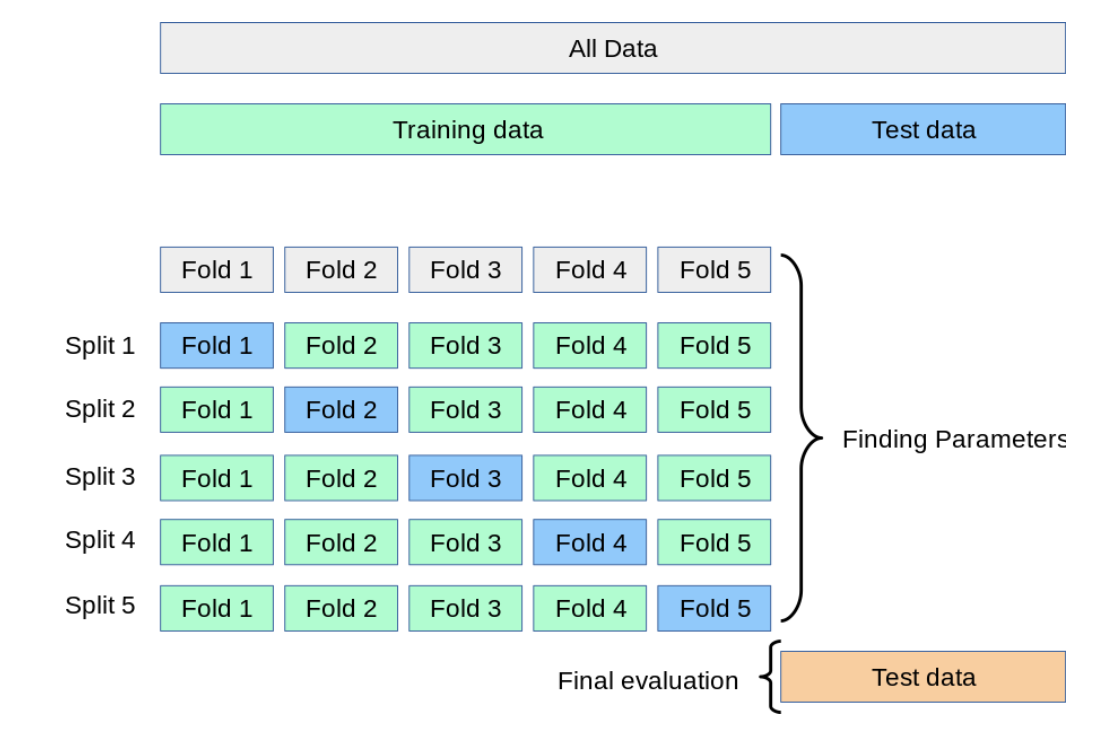

### Split into Train and Test Sets

El método más simple que podemos usar para evaluar el rendimiento de un algoritmo de aprendizaje automático es usar diferentes conjuntos de datos de entrenamiento y prueba. Podemos tomar nuestro conjunto de datos original y dividirlo en dos partes. Entrene el algoritmo en la primera parte, haga predicciones en la segunda parte y evalúe las predicciones contra los resultados esperados. El tamaño de la división puede depender del tamaño y los detalles de su conjunto de datos, aunque es común usar el 67% de los datos para el entrenamiento y el 33% restante para las pruebas.

Esta técnica de evaluación de algoritmos es muy rápida. Es ideal para grandes conjuntos de datos (millones de registros) donde existe una fuerte evidencia de que ambas divisiones de datos son representativas del problema subyacente. Debido a la velocidad, es útil usar este enfoque cuando el algoritmo que está investigando es lento para entrenar. Una desventaja de esta técnica es que puede tener una gran variación. Esto significa que las diferencias en el conjunto de datos de entrenamiento y prueba pueden dar lugar a diferencias significativas en la estimación de la precisión.

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
test_size = 0.33
seed= 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) 
model = LogisticRegression(solver='lbfgs',max_iter=200) 
model.fit(X_train, Y_train) 
result = model.score(X_test, Y_test) 
print("Accuracy: %.3f%%" % (result*100.0) )



Accuracy: 78.740%


Podemos ver que la precisión estimada para el modelo fue aproximadamente del 78%. 

Tenga en cuenta que además de especificar el tamaño de la división, también especificamos la semilla aleatoria. 

Debido a que la división de los datos es aleatoria, queremos asegurarnos de que los resultados sean reproducibles. 

Al especificar la semilla aleatoria, nos aseguramos de obtener los mismos números aleatorios cada vez que ejecutamos el código y, a su vez, la misma división de datos.

Esto es importante si queremos comparar este resultado con la precisión estimada de otro algoritmo de aprendizaje automático o el mismo algoritmo con una configuración diferente. 

Para garantizar que la comparación fuera manzanas por manzanas, debemos asegurarnos de que estén capacitadas y probadas exactamente con los mismos datos.

### K-fold Cross Validation

La validación cruzada es un enfoque que puede utilizar para estimar el rendimiento de un algoritmo de aprendizaje automático con menos variación que una división de conjunto de prueba de tren. Funciona dividiendo el conjunto de datos en partes k (por ejemplo, k = 5 o k = 10). 

Cada división de los datos se denomina pliegue. El algoritmo se entrena en k - 1 pliegues con uno retenido y probado en el pliegue retenido. Esto se repite para que cada pliegue del conjunto de datos tenga la oportunidad de ser el conjunto de prueba retenido. Después de ejecutar la validación cruzada, terminas con k diferentes puntajes de rendimiento que puedes resumir usando una media y una desviación estándar.

El resultado es una estimación más confiable del rendimiento del algoritmo en los nuevos datos. Es más preciso porque el algoritmo se entrena y evalúa varias veces en diferentes datos. 

La elección de k debe permitir que el tamaño de cada partición de prueba sea lo suficientemente grande como para ser una muestra razonable del problema, al tiempo que permite suficientes repeticiones de la evaluación del algoritmo de la prueba de tren para proporcionar una estimación justa del rendimiento de los algoritmos en datos no vistos.

Para conjuntos de datos de tamaño modesto en los miles o decenas de miles de registros, los valores de k de 3, 5 y 10 son comunes. En el siguiente ejemplo usamos validación cruzada 10 veces.

In [46]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

In [47]:
num_folds = 10 
seed = 7 
kfold = KFold(n_splits=num_folds, random_state=seed) 
model = LogisticRegression(solver='lbfgs',max_iter=200) 
results = cross_val_score(model, X, Y, cv=kfold) 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0) )



Accuracy: 77.604% (5.158%)


In [48]:
results

array([0.688, 0.818, 0.766, 0.688, 0.779, 0.792, 0.844, 0.831, 0.75 ,
       0.803])

Puede ver que informamos tanto la media como la desviación estándar de la medida de rendimiento. Al resumir las medidas de rendimiento, es una buena práctica resumir la distribución de las medidas, en este caso suponiendo una distribución gaussiana del rendimiento (un supuesto muy razonable) y registrando la media y la desviación estándar.

### Leave One Out Cross Validation

Puede configurar la validación cruzada para que el tamaño del pliegue sea 1 (k se establece en el número de observaciones en su conjunto de datos). 

Esta variación de la validación cruzada se denomina validación cruzada de dejar uno fuera. El resultado es una gran cantidad de medidas de rendimiento que se pueden resumir en un esfuerzo para dar una estimación más razonable de la precisión de su modelo en datos no vistos.

Una desventaja es que puede ser un procedimiento computacionalmente más costoso que la validación cruzada k-fold. En el siguiente ejemplo, utilizamos la validación cruzada de dejar uno fuera.

In [172]:
from sklearn.model_selection import LeaveOneOut 
from sklearn.model_selection import cross_val_score


In [177]:
num_folds = 10 
loocv = LeaveOneOut() 
model = LogisticRegression(solver='lbfgs',max_iter=300) 
results = cross_val_score(model, X, Y, cv=loocv) 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0) )


Accuracy: 77.604% (41.689%)


## Repeated Random Test-Train Splits

Otra variación en la validación cruzada de k-fold es crear una división aleatoria de los datos como la división de tren / prueba descrita anteriormente, pero repetir el proceso de división y evaluación del algoritmo varias veces, como la validación cruzada. 

Esto tiene la velocidad de usar una división de tren / prueba y la reducción de la varianza en el rendimiento estimado de la validación cruzada k-fold. 

También puede repetir el proceso muchas veces más según sea necesario para mejorar la precisión. Una desventaja es que las repeticiones pueden incluir gran parte de los mismos datos en el tren o la prueba se divide de una carrera a otra, lo que introduce redundancia en la evaluación.

El siguiente ejemplo divide los datos en una división de tren / prueba del 67% / 33% y repite el proceso 10 veces.

In [178]:
from sklearn.model_selection import ShuffleSplit

In [180]:
n_splits = 10 
test_size = 0.33

seed = 7 
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed) 
model = LogisticRegression(solver='lbfgs',max_iter=200) 
results = cross_val_score(model, X, Y, cv=kfold) 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0) )



Accuracy: 76.535% (2.235%)


Podemos ver que en este caso la distribución de la medida de rendimiento está a la par con la validación cruzada k-fold anterior.


###  Recomendación de cuando usar las técnicas 

Esta sección enumera algunos consejos para considerar qué técnica de remuestreo usar en diferentes circunstancias.

- En general, la validación cruzada k-fold es el estándar de oro para evaluar el rendimiento de un algoritmo de aprendizaje automático en datos no vistos con k configurado en 3, 5 o 10.

- Usar una división de train / test es bueno para la velocidad cuando se usa un algoritmo lento y produce estimaciones de rendimiento con un sesgo menor cuando se usan conjuntos de datos grandes.

- Las técnicas como la validación cruzada de dejar uno fuera y las divisiones aleatorias repetidas pueden ser intermedios útiles cuando se trata de equilibrar la variación en el rendimiento estimado, la velocidad de entrenamiento del modelo y el tamaño del conjunto de datos.

El mejor consejo es experimentar y encontrar una técnica para su problema que sea rápida y produzca estimaciones razonables de rendimiento que pueda usar para tomar decisiones. En caso de duda, utilice la validación cruzada 10 veces.


## Classiﬁcation Metrics

Las métricas que elige para evaluar sus algoritmos de aprendizaje automático son muy importantes. La elección de las métricas influye en cómo se mide y compara el rendimiento de los algoritmos de aprendizaje automático. 

Influyen en cómo evalúa la importancia de las diferentes características en los resultados y su elección final de qué algoritmo elegir. 


- Classiﬁcation Accuracy. 

- Logarithmic Loss.

- Area Under ROC Curve. 

- Confusion Matrix.

- Classiﬁcation Report.

https://www.quora.com/What-do-you-mean-by-scores-in-machine-learning-algorithms

https://en.wikipedia.org/wiki/Precision_and_recall

### Classiﬁcation Accuracy

La precisión de clasificación es el número de predicciones correctas hechas como una relación de todas las predicciones realizadas.

Esta es la medida de evaluación más común para problemas de clasificación, también es la más mal utilizada. 

Realmente solo es adecuado cuando hay un número igual de observaciones en cada clase (que rara vez es el caso) y que todas las predicciones y errores de predicción son igualmente importantes, lo que a menudo no es el caso.

A continuación se muestra un ejemplo de cálculo de precisión de clasificación.



http://wiki.fast.ai/index.php/Log_Loss

https://developers.google.com/machine-learning/crash-course/classification/accuracy

In [182]:
model = LogisticRegression(solver='lbfgs',max_iter=200) 
scoring = 'accuracy' 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()) )



Accuracy: 0.765 (0.022)


### Logarithmic Loss

La pérdida logarítmica (o logloss) es una medida de rendimiento para evaluar las predicciones de las probabilidades de pertenencia a una clase determinada. 

La probabilidad escalar entre 0 y 1 puede verse como una medida de confianza para una predicción mediante un algoritmo. 

Las predicciones correctas o incorrectas son recompensadas o castigadas proporcionalmente a la confianza de la predicción. A continuación se muestra un ejemplo de cálculo de logloss para predicciones de regresión logística en el conjunto de datos de inicio de diabetes de los indios Pima.

In [186]:
kfold = KFold(n_splits=10, random_state=7) 
model = LogisticRegression(solver='lbfgs',max_iter=200) 
scoring = 'neg_log_loss' 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()) )


Logloss: -0.484 (0.062)


Logloss más pequeño es mejor con 0 que representa un logloss perfecto. Como se mencionó anteriormente, la medida se invierte para que sea ascendente cuando se usa la función de puntuación de valor cruzado ().

### Area Under ROC Curve

El área bajo la curva ROC (o AUC para abreviar) es una métrica de rendimiento para problemas de clasificación binaria.

El AUC representa la capacidad de un modelo para discriminar entre clases positivas y negativas. Un área de 1.0 representa un modelo que hizo todas las predicciones perfectamente. 

Un área de 0.5 representa un modelo tan bueno como aleatorio. ROC puede desglosarse en sensibilidad y especificidad. Un problema de clasificación binaria es realmente un intercambio entre sensibilidad y especificidad.

- La sensibilidad es la verdadera tasa positiva también llamada recuperación. Es el número de instancias de la clase positiva (primera) que realmente predijo correctamente

- La especificidad también se denomina tasa negativa verdadera. Es el número de instancias de la clase negativa (segunda) que realmente se predijeron correctamente.

In [188]:
kfold = KFold(n_splits=10, random_state=7) 
model = LogisticRegression(solver='lbfgs',max_iter=200) 
scoring = 'roc_auc' 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()) )

AUC: 0.828 (0.043)


Puede ver que el AUC es relativamente cercano a 1 y mayor que 0.5, lo que sugiere cierta habilidad en las predicciones

### Confusion Matrix

La matriz de confusión es una presentación práctica de la precisión de un modelo con dos o más clases. La tabla presenta predicciones en el eje x y resultados de precisión en el eje y. Las celdas de la tabla son el número de predicciones realizadas por un algoritmo de aprendizaje automático. 

Por ejemplo, un algoritmo de aprendizaje automático puede predecir 0 o 1 y cada predicción puede haber sido 0 o 1. Las predicciones para 0 que en realidad eran 0 aparecen en la celda para predicción = 0 y real = 0, mientras que las predicciones para 0 que fueron en realidad 1 aparece en la celda para predicción = 0 y real = 1. Y así sucesivamente.

A continuación se muestra un ejemplo de cálculo de una matriz de confusión para un conjunto de predicciones mediante una Regresión logística sobre el inicio del conjunto de datos de diabetes de los indios Pima.

In [190]:
from sklearn.metrics import confusion_matrix

In [191]:
test_size = 0.33
seed = 7 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) 
model = LogisticRegression(solver='lbfgs',max_iter=200) 
model.fit(X_train, Y_train) 
predicted = model.predict(X_test) 
matrix = confusion_matrix(Y_test, predicted) 
print(matrix)




[[142  20]
 [ 34  58]]


Aunque la matriz se imprime sin encabezados, puede ver que la mayoría de las predicciones caen en la línea diagonal de la matriz (que son predicciones correctas).

## Regression Metrics

- Mean Absolute Error. 

- Mean Squared Error.

- $R^2$ .

### Mean Squared Error

El error absoluto medio (o MAE) es la suma de las diferencias absolutas entre las predicciones y los valores reales. Da una idea de cuán erróneas fueron las predicciones.

La medida da una idea de la magnitud del error, pero no tiene idea de la dirección (por ejemplo, sobre o por debajo de la predicción). El siguiente ejemplo demuestra el cálculo del error absoluto medio en el conjunto de datos del precio de la vivienda de Boston.



In [195]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [196]:
X, y = load_boston(return_X_y=True)

In [199]:
num_folds = 10 
kfold = KFold(n_splits=10, random_state=7) 
model = LinearRegression() 
scoring = 'neg_mean_squared_error' 
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring) 
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()) )

MSE: -34.705 (45.574)


Un valor de 0 indica que no hay error o predicciones perfectas. Al igual que logloss, esta métrica se invierte mediante la función cross val score ().

### Mean Squared Error

El error cuadrático medio (o MSE) es muy parecido al error absoluto medio en el sentido de que proporciona una idea general de la magnitud del error. 

Tomar la raíz cuadrada del error cuadrático medio convierte las unidades a las unidades originales de la variable de salida y puede ser significativo para la descripción y presentación. 

Esto se llama el error cuadrático medio (o RMSE). El siguiente ejemplo proporciona una demostración del cálculo del error cuadrático medio.

In [201]:
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression() 
scoring = 'neg_mean_squared_error' 
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring) 
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))



MSE: -34.705 (45.574)


Esta métrica también se invierte para que los resultados estén aumentando. Recuerde tomar el valor absoluto antes de sacar la raíz cuadrada si está interesado en calcular el RMSE.

### $R^2$ Metric

The $R^2$ (or R Squared) metric provides an indication of the goodness of ﬁt of a set of predictions to the actual values. In statistical literature this measure is called the coeﬃcient of determination. 

This is a value between 0 and 1 for no-ﬁt and perfect ﬁt respectively. The example below provides a demonstration of calculating the mean $R^2$ for a set of predictions.


In [203]:
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression() 
scoring = 'r2' 
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()) )



R^2: 0.203 (0.595)


Puede ver que las predicciones se ajustan mal a los valores reales con un valor más cercano a cero y menor que 0.5.

## Algorithms Overview

Vamos a echar un vistazo a seis algoritmos de clasificación que puede verificar en su conjunto de datos. Comenzando con dos algoritmos lineales de aprendizaje automático:

In [208]:
data = pd.read_csv("pima-indians-diabetes.csv",names=names)
print(data.shape)

info = data.values 
X = info[:,0:8] 
Y = info[:,8]

(768, 9)


### Logistic Regression

La regresión logística supone una distribución gaussiana para las variables de entrada numéricas y puede modelar problemas de clasificación binaria.

In [210]:
num_folds = 10

kfold = KFold(n_splits=10, random_state=7) 
model = LogisticRegression(solver='lbfgs',max_iter=200) 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())



0.7760423786739576


## Linear Discriminant Analysis

El análisis discriminante lineal o LDA es una técnica estadística para la clasificación binaria y multiclase. También supone una distribución gaussiana para las variables de entrada numéricas.

In [211]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [212]:
num_folds = 10 
kfold = KFold(n_splits=10, random_state=7) 
model = LinearDiscriminantAnalysis() 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())


0.773462064251538


## Nonlinear Machine Learning Algorithms

### k-Nearest Neighbors

El algoritmo k-vecinos más cercanos (o KNN) utiliza una métrica de distancia para encontrar las k instancias más similares en los datos de entrenamiento para una nueva instancia y toma el resultado medio de los vecinos como la predicción.

In [213]:
from sklearn.neighbors import KNeighborsClassifier

In [214]:
num_folds = 10 
kfold = KFold(n_splits=10, random_state=7) 
model = KNeighborsClassifier() 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())


0.7265550239234451


### Naive Bayes

Naive Bayes calcula la probabilidad de cada clase y la probabilidad condicional de cada clase dado cada valor de entrada. Estas probabilidades se estiman para nuevos datos y se multiplican juntas, suponiendo que todas sean independientes (una suposición simple o ingenua). 

Cuando se trabaja con datos de valor real, se supone que una distribución gaussiana estima fácilmente las probabilidades para las variables de entrada utilizando la función de densidad de probabilidad gaussiana.

In [215]:
from sklearn.naive_bayes import GaussianNB

In [216]:
kfold = KFold(n_splits=10, random_state=7) 
model = GaussianNB() 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())


0.7551777170198223


### Classiﬁcation and Regression Trees

Los árboles de clasificación y regresión (CART o simplemente árboles de decisión) construyen un árbol binario a partir de los datos de entrenamiento. 

Los puntos divididos se eligen con avidez evaluando cada atributo y cada valor de cada atributo en los datos de entrenamiento para minimizar una función de costo (como el índice de Gini).

In [217]:
from sklearn.tree import DecisionTreeClassifier

In [219]:
kfold = KFold(n_splits=10, random_state=7) 
model = DecisionTreeClassifier() 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())

0.6978468899521532


### Support Vector Machines

Las máquinas de vectores de soporte (o SVM) buscan una línea que separe mejor dos clases. Las instancias de datos que están más cerca de la línea que mejor separa las clases se denominan vectores de soporte e influencian donde se coloca la línea. SVM se ha ampliado para admitir varias clases. De particular importancia es el uso de diferentes funciones del núcleo a través del parámetro del núcleo.

La potente función de base radial se utiliza de forma predeterminada.

In [220]:
from sklearn.svm import SVC

In [223]:
kfold = KFold(n_splits=10, random_state=7) 
model = SVC(gamma='auto') 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())


0.6510252904989747


## Algoritmos de regresión

- Linear Regression. 

- Ridge Regression.

- LASSO Linear Regression. 

- Elastic Net Regression.

Then looking at three nonlinear machine learning algorithms:

- k-Nearest Neighbors.

- Classiﬁcation and Regression Trees.

- Support Vector Machines.

### Linear Regression


La regresión lineal supone que las variables de entrada tienen una distribución gaussiana. También se supone que las variables de entrada son relevantes para la variable de salida y que no están altamente correlacionadas entre sí (un problema llamado colinealidad).


In [224]:
X, y = load_boston(return_X_y=True)

In [229]:
kfold = KFold(n_splits=10, random_state=7) 
model = LinearRegression() 
scoring = 'neg_mean_squared_error' 
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring) 
print(results.mean())


-34.705255944524914


### Ridge Regression

La regresión de cresta es una extensión de la regresión lineal donde la función de pérdida se modifica para minimizar la complejidad del modelo medido como el valor al cuadrado de los valores del coeficiente (también llamado norma L2).

In [230]:
from sklearn.linear_model import Ridge

In [232]:
num_folds = 10 
kfold = KFold(n_splits=10, random_state=7)
model = Ridge() 
scoring = 'neg_mean_squared_error' 

results = cross_val_score(model, X, y, cv=kfold, scoring=scoring) 
print(results.mean())


-34.07824620925938


### LASSO Regression

El operador de selección y contracción menos absoluta (o LASSO para abreviar) es una modificación de la regresión lineal, como la regresión de cresta, donde la función de pérdida se modifica para minimizar la complejidad del modelo medido como el valor absoluto de la suma de los valores coeficientes (también llamado la norma L1).

In [233]:
from sklearn.linear_model import Lasso

In [234]:
kfold = KFold(n_splits=10, random_state=7) 
model = Lasso() 
scoring = 'neg_mean_squared_error' 
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring) 
print(results.mean())


-34.46408458830232


### ElasticNet Regression

ElasticNet es una forma de regresión de regularización que combina las propiedades de la Regresión de Ridge y la regresión LASSO. Busca minimizar la complejidad del modelo de regresión (magnitud y número de coeficientes de regresión) penalizando el modelo utilizando tanto la norma L2 (suma de valores de coeficientes cuadrados) como la norma L1 (suma de valores de coeficientes absolutos).

In [235]:
from sklearn.linear_model import ElasticNet

In [237]:
kfold = KFold(n_splits=10, random_state=7) 
model = ElasticNet() 
scoring = 'neg_mean_squared_error' 
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring) 
print(results.mean())


-31.16457371424977


## Nonlinear Machine Learning Algorithms

### K-Nearest Neighbors

El algoritmo k-vecinos más cercanos (o KNN) localiza las k instancias más similares en el conjunto de datos de entrenamiento para una nueva instancia de datos. 

De los k vecinos, se toma una variable de salida media o mediana como la predicción. Cabe destacar la métrica de distancia utilizada (el argumento de la métrica). 

La distancia de Minkowski se usa por defecto, que es una generalización tanto de la distancia euclidiana (usada cuando todas las entradas tienen la misma escala) como de la distancia de Manhattan (para cuando las escalas de las variables de entrada difieren).

In [238]:
from sklearn.neighbors import KNeighborsRegressor

In [240]:
kfold = KFold(n_splits=10, random_state=7) 
model = KNeighborsRegressor() 
scoring = 'neg_mean_squared_error' 
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring) 
print(results.mean())


-107.28683898039215


### Classiﬁcation and Regression Trees

Los árboles de decisión o los árboles de clasificación y regresión (CART como se los conoce) usan los datos de entrenamiento para seleccionar los mejores puntos para dividir los datos con el fin de minimizar una métrica de costos. 

La métrica de costo predeterminada para los árboles de decisión de regresión es el error cuadrático medio, especificado en el parámetro criterio.

In [241]:
from sklearn.tree import DecisionTreeRegressor

In [243]:
kfold = KFold(n_splits=10, random_state=7) 
model = DecisionTreeRegressor() 
scoring = 'neg_mean_squared_error' 
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring) 
print(results.mean())


-39.53196235294117


### Support Vector Machines

Las máquinas de vectores de soporte (SVM) se desarrollaron para la clasificación binaria. La técnica se ha extendido para los problemas de predicción de valores reales llamados Support Vector Regression (SVR). Al igual que el ejemplo de clasificación, SVR se basa en la biblioteca LIBSVM.

In [244]:
from sklearn.svm import SVR

In [248]:
num_folds = 10 
kfold = KFold(n_splits=10, random_state=7) 
model = SVR(gamma= 'auto') 
scoring = 'neg_mean_squared_error' 
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring) 
print(results.mean())


-91.04782433324428


## Compare Machine Learning Algorithms Consistently



In [249]:
data = pd.read_csv("pima-indians-diabetes.csv",names=names)
print(data.shape)

info = data.values 
X = info[:,0:8] 
Y = info[:,8]

(768, 9)


In [255]:
# prepare models 

models = [] 
models.append(('LR', LogisticRegression(solver='lbfgs',max_iter=200))) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC(gamma='auto'))) 

# evaluate each model in turn 
results = [] 
names = [] 
scoring = 'accuracy' 

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7) 
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg) 
    


LR: 0.776042 (0.051575)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.686090 (0.066883)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


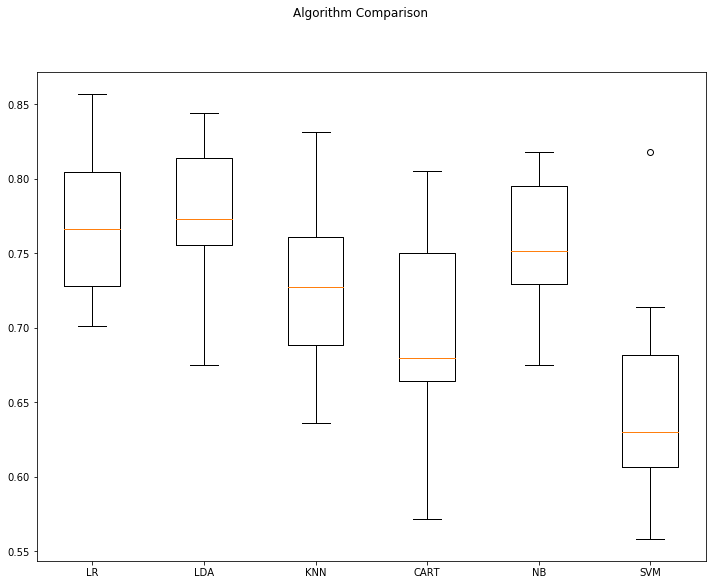

In [253]:
# boxplot algorithm comparison 
fig = plt.figure(figsize=(12,9)) 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()



A partir de estos resultados, sugeriría que tanto la regresión logística como el análisis discriminante lineal son quizás dignos de estudios adicionales sobre este problema.

## Automate Machine Learning Workﬂows with Pipelines

Hay flujos de trabajo estándar en un proyecto de aprendizaje automático que pueden automatizarse. 

En Python scikit-learn, las tuberías ayudan a definir y automatizar claramente estos flujos de trabajo. En este capítulo descubrirá Pipelines en scikit-learn y cómo puede automatizar los flujos de trabajo comunes de aprendizaje automático.

Una trampa fácil para caer en el aprendizaje automático aplicado es filtrar datos de su conjunto de datos de entrenamiento a su conjunto de datos de prueba. Para evitar esta trampa, necesita un arnés de prueba robusto con una fuerte separación de training and testing.

Esto incluye la preparación de datos. La preparación de datos es una forma fácil de filtrar el conocimiento de todo el conjunto de datos de entrenamiento al algoritmo. Por ejemplo, preparar sus datos usando la normalización o la estandarización en todo el conjunto de datos de entrenamiento antes de aprender no sería una prueba válida porque el conjunto de datos de entrenamiento habría sido influenciado por la escala de los datos en el conjunto de pruebas.


Las tuberías lo ayudan a evitar la fuga de datos en su arnés de prueba al garantizar que la preparación de datos, como la estandarización, esté limitada a cada pliegue de su procedimiento de validación cruzada. El siguiente ejemplo demuestra este importante flujo de trabajo de preparación de datos y evaluación de modelos sobre el inicio del conjunto de datos de diabetes de los indios Pima. La tubería se define con dos pasos:

1. Estandarizar los datos.

2. Aprender un modelo de análisis lineal discriminante.

In [256]:
from sklearn.pipeline import Pipeline

In [257]:
# create pipeline 
estimators = [] 
estimators.append(('standardize', StandardScaler())) 
estimators.append(('lda', LinearDiscriminantAnalysis())) 
model = Pipeline(estimators) 

# evaluate pipeline 
kfold = KFold(n_splits=10, random_state=7) 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())



0.773462064251538


Observe cómo creamos una lista de pasos de Python que se proporcionan a Pipeline para procesar los datos. Observe también cómo la tubería en sí misma se trata como un estimador y se evalúa en su totalidad mediante el procedimiento de validación cruzada k-fold. Ejecutar el ejemplo proporciona un resumen de la precisión de la configuración en el conjunto de datos.

### Feature Extraction and Modeling Pipeline

La extracción de características es otro procedimiento que es susceptible a la fuga de datos. Al igual que la preparación de datos, los procedimientos de extracción de funciones deben limitarse a los datos de su conjunto de datos de entrenamiento. 

La canalización proporciona una herramienta útil llamada FeatureUnion que permite que los resultados de múltiples procedimientos de selección y extracción de características se combinen en un conjunto de datos más grande en el que se puede entrenar un modelo. Es importante destacar que toda la extracción de características y la unión de características se produce dentro de cada pliegue del procedimiento de validación cruzada. El siguiente ejemplo muestra la tubería definida con cuatro pasos:

1. Extracción de características con análisis de componentes principales (3 características).

2. Extracción de características con selección estadística (6 características).

3. Unión de características.

4. Aprenda un modelo de regresión logística.

La tubería luego se evalúa utilizando una validación cruzada 10 veces.

In [259]:
from sklearn.pipeline import FeatureUnion

In [261]:
# create feature union
features = [] 
features.append(('pca', PCA(n_components=3))) 
features.append(('select_best', SelectKBest(k=6))) 
feature_union = FeatureUnion(features) 

# create pipeline 
estimators = [] 
estimators.append(('feature_union', feature_union)) 
estimators.append(('logistic', LogisticRegression(solver='lbfgs',max_iter=200))) 
model = Pipeline(estimators) 

# evaluate pipeline 

kfold = KFold(n_splits=10, random_state=7) 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())


0.7760423786739576


Observe cómo FeatureUnion es su propia canalización que, a su vez, es un solo paso en la canalización final utilizada para alimentar la regresión logística. Esto podría hacerle pensar acerca de cómo puede comenzar a incrustar tuberías dentro de las tuberías. Ejecutar el ejemplo proporciona un resumen de la precisión de la configuración en el conjunto de datos.

## Improve Performance with Ensembles

Los conjuntos pueden aumentar la precisión de su conjunto de datos. En este capítulo descubrirá cómo puede crear algunos de los tipos de conjuntos más potentes en Python utilizando scikit-learn.

Esta lección lo guiará a través de Boosting, Bagging y Majority Voting y le mostrará cómo puede continuar aumentando la precisión de los modelos en sus propios conjuntos de datos. Después de completar esta lección sabrás:


- (bagging ensemble) Embolsado. Construyendo múltiples modelos (típicamente del mismo tipo) a partir de diferentes submuestras del conjunto de datos de entrenamiento.

- (boosting ensemble) Impulso. Construir múltiples modelos (típicamente del mismo tipo), cada uno de los cuales aprende a corregir los errores de predicción de un modelo anterior en la secuencia de modelos.

- (voting ensemble) La construcción de modelos múltiples (típicamente de diferentes tipos) y estadísticas simples (como calcular la media) se utilizan para combinar predicciones.


### Bagged Decision Trees

El ensacado funciona mejor con algoritmos que tienen una alta varianza. Un ejemplo popular son los árboles de decisión, a menudo construidos sin poda. En el siguiente ejemplo se muestra un ejemplo del uso del BaggingClassifier con el algoritmo de Clasificación y Árboles de regresión (DecisionTreeClassifier 1).

In [264]:
from sklearn.ensemble import BaggingClassifier

In [265]:
seed = 7 
kfold = KFold(n_splits=10, random_state=seed) 
cart = DecisionTreeClassifier() 
num_trees = 100 
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed) 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())


0.770745044429255


### Random Forest

Random Forests es una extensión de los árboles de decisión en bolsas. Las muestras del conjunto de datos de entrenamiento se toman con reemplazo, pero los árboles se construyen de una manera que reduce la correlación entre los clasificadores individuales. 

Específicamente, en lugar de elegir con avidez el mejor punto de división en la construcción de cada árbol, solo se considera un subconjunto aleatorio de características para cada división. Puede construir un modelo de bosque aleatorio para la clasificación utilizando el RandomForestClassifier clase 2. 

El siguiente ejemplo demuestra el uso de Random Forest para la clasificación con 100 árboles y puntos divididos elegidos de una selección aleatoria de 3 características.

In [266]:
from sklearn.ensemble import RandomForestClassifier

In [267]:
num_trees = 100 
max_features = 3 
kfold = KFold(n_splits=10, random_state=7) 
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features) 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())



0.7603725222146276


### Extra Trees

Los árboles adicionales son otra modificación del ensacado donde se construyen árboles aleatorios a partir de muestras del conjunto de datos de entrenamiento. Puede construir un modelo de árboles extra para la clasificación usando ExtraTreesClassifier clase 3. El siguiente ejemplo proporciona una demostración de árboles adicionales con el número de árboles establecido en 100 y las divisiones elegidas entre 7 características aleatorias.

In [269]:
num_trees = 100 
max_features = 7 
kfold = KFold(n_splits=10, random_state=7) 
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features) 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())


0.7564593301435407


## Boosting Algorithms

Los algoritmos de conjunto de refuerzo crean una secuencia de modelos que intentan corregir los errores de los modelos anteriores a ellos en la secuencia. Una vez creados, los modelos hacen predicciones que pueden ser ponderadas por su precisión demostrada y los resultados se combinan para crear una predicción de salida final. Los dos algoritmos de aprendizaje automático de conjunto de refuerzo más comunes son:

ˆ AdaBoost.

ˆ Incremento de gradiente estocástico.

### AdaBoost

AdaBoost fue quizás el primer algoritmo de conjunto de refuerzo exitoso. Generalmente funciona ponderando las instancias en el conjunto de datos según lo fácil o difícil que es clasificarlas, lo que permite que el algoritmo les preste o les preste menos atención en la construcción de modelos posteriores. Puede construir un modelo AdaBoost para la clasificación usando el AdaBoostClassifier clase 4. El siguiente ejemplo demuestra la construcción de 30 árboles de decisión en secuencia utilizando el algoritmo AdaBoost.

In [270]:
from sklearn.ensemble import AdaBoostClassifier

In [271]:
num_trees = 30 
seed=7 
kfold = KFold(n_splits=10, random_state=seed) 
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed) 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())


0.760457963089542


### Stochastic Gradient Boosting

El aumento estocástico de gradiente (también llamado máquinas de aumento de gradiente) es una de las técnicas de conjunto más sofisticadas. También es una técnica que está demostrando ser quizás una de las mejores técnicas disponibles para mejorar el rendimiento a través de conjuntos. Puede construir un modelo de Gradient Boosting para la clasificación usando el GradientBoostingClassifier clase 5. El siguiente ejemplo demuestra el aumento de gradiente estocástico para la clasificación con 100 árboles.

In [273]:
from sklearn.ensemble import GradientBoostingClassifier

In [274]:
seed = 7 
num_trees = 100 
kfold = KFold(n_splits=10, random_state=seed) 
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed) 
results = cross_val_score(model, X, Y, cv=kfold) 
print(results.mean())



0.7669002050580999


## Voting Ensemble


Votar es una de las formas más simples de combinar las predicciones de múltiples algoritmos de aprendizaje automático. Funciona creando primero dos o más modelos independientes a partir de su conjunto de datos de entrenamiento. 

Luego se puede usar un clasificador de votación para ajustar sus modelos y promediar las predicciones de los submodelos cuando se le pide que haga predicciones para nuevos datos. Las predicciones de los submodelos se pueden ponderar, pero es difícil especificar los pesos para los clasificadores de forma manual o incluso heurística. 

Los métodos más avanzados pueden aprender cómo ponderar mejor las predicciones de los submodelos, pero esto se llama apilamiento (agregación apilada) y actualmente no se proporciona en scikit-learn.

Puede crear un modelo de conjunto de votación para la clasificación utilizando el VotingClassifier clase 6.

El siguiente código proporciona un ejemplo de combinación de las predicciones de regresión logística, árboles de clasificación y regresión y máquinas de vectores de soporte juntas para un problema de clasificación.

In [275]:
from sklearn.ensemble import VotingClassifier

In [278]:
kfold = KFold(n_splits=10, random_state=7) 
# create the sub models 
estimators = [] 
model1 = LogisticRegression(solver='lbfgs',max_iter=200) 
estimators.append(('logistic', model1)) 
model2 = DecisionTreeClassifier() 
estimators.append(('cart', model2)) 
model3 = SVC(gamma='auto') 
estimators.append(('svm', model3)) 
# create the ensemble model 
ensemble = VotingClassifier(estimators) 
results = cross_val_score(ensemble, X, Y, cv=kfold) 
print(results.mean())



0.7394907723855092


## Improve Performance with Algorithm Tuning

El ajuste de algoritmo es un paso final en el proceso de aprendizaje automático aplicado antes de finalizar su modelo. A veces se denomina optimización de hiperparámetros, donde los parámetros del algoritmo se denominan hiperparámetros, mientras que los coeficientes encontrados por el algoritmo de aprendizaje automático se denominan parámetros. La optimización sugiere la naturaleza de búsqueda del problema. Expresado como un problema de búsqueda, puede usar diferentes estrategias de búsqueda para encontrar un parámetro o conjunto de parámetros bueno y robusto para un algoritmo en un problema dado. Python scikit-learn proporciona dos métodos simples para el ajuste de parámetros de algoritmos:

- (Grid Search Parameter Tuning.) Ajuste de parámetros de búsqueda de cuadrícula.

- (Random Search Parameter Tuning) Ajuste de parámetros de búsqueda aleatoria.

### Grid Search Parameter Tuning

La búsqueda de cuadrícula es un enfoque para el ajuste de parámetros que construirá y evaluará metódicamente un modelo para cada combinación de parámetros de algoritmo especificados en una cuadrícula. Puedes realizar una grilla buscar utilizando GridSearchCV clase.

El siguiente ejemplo evalúa diferentes valores alfa para el algoritmo de Regresión de Ridge en el conjunto de datos estándar de diabetes. Esta es una búsqueda de cuadrícula unidimensional.

In [279]:
from sklearn.model_selection import GridSearchCV

In [283]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,0]) 
param_grid = dict(alpha=alphas) 
model = Ridge() 
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5) 
grid.fit(X, Y) 
print(grid.best_score_) 
print(grid.best_estimator_.alpha)


0.276078532219954
1.0


Ejecutar el ejemplo enumera el puntaje óptimo alcanzado y el conjunto de parámetros en la cuadrícula que logró ese puntaje. En este caso el valor alfa de 1.0.

### Random Search Parameter Tuning


La búsqueda aleatoria es un enfoque de ajuste de parámetros que muestreará los parámetros del algoritmo de una distribución aleatoria (es decir, uniforme) para un número fijo de iteraciones. 

Se construye y evalúa un modelo para cada combinación de parámetros elegidos. Puede realizar una búsqueda aleatoria de parámetros de algoritmo utilizando RandomizedSearchCV clase.

El siguiente ejemplo evalúa diferentes valores alfa aleatorios entre 0 y 1 para el algoritmo de regresión de Ridge en el conjunto de datos de diabetes estándar. Se realizan un total de 100 iteraciones con valores alfa uniformemente aleatorios seleccionados en el rango entre 0 y 1 (el rango que pueden tomar los valores alfa).


In [287]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [289]:
param_grid = {'alpha': uniform()} 
model = Ridge() 
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=7,cv=5)
rsearch.fit(X, Y) 
print(rsearch.best_score_) 
print(rsearch.best_estimator_.alpha)



0.2760776446693914
0.9779895119966027


Ejecutar el ejemplo produce resultados muy similares a los del ejemplo de búsqueda de cuadrícula anterior. Se descubre un valor alfa óptimo cercano a 1.0.

El ajuste de parámetros de algoritmo es un paso importante para mejorar el rendimiento del algoritmo justo antes de presentar resultados o preparar un sistema para la producción.

# Template Summary


In [290]:
# Python Project Template

# 1. Prepare Problem 
# a) Load libraries 
# b) Load dataset

# 2. Summarize Data 
# a) Descriptive statistics 
# b) Data visualizations

# 3. Prepare Data 
# a) Data Cleaning 
# b) Feature Selection 
# c) Data Transforms

# 4. Evaluate Algorithms 
# a) Split-out validation dataset 
# b) Test options and evaluation metric 
# c) Spot Check Algorithms 
# d) Compare Algorithms

# 5. Improve Accuracy 
# a) Algorithm Tuning 
# b) Ensembles

# 6. Finalize Model 
# a) Predictions on validation dataset 
# b) Create standalone model on entire training dataset 
# c) Save model for later use

# Tarea 1

Load Iris Dataset




# Tarea 2

El enfoque de este proyecto será el conjunto de datos 1 de Sonar Mines vs Rocks. El problema es predecir objetos de metal o roca a partir de los datos de retorno de la sonda. Cada patrón es un conjunto de 60 números en el rango de 0.0 a 1.0. Cada número representa la energía dentro de una banda de frecuencia particular, integrada durante un cierto período de tiempo. La etiqueta asociada con cada registro contiene la letra R si el objeto es una roca y M si es una mina (cilindro de metal). Los números en las etiquetas están en orden creciente de ángulo de aspecto, pero no codifican el ángulo directamente.


https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)



La etiqueta asociada con cada registro contiene la letra "R" si el objeto es una roca y "M" si es una mina (cilindro de metal).

https://www.kaggle.com/ypzhangsam/sonaralldata#sonar.all-data.csv